## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. Define accuracy. Can an accurate model be flawed for practical use? Explain.
4. What does the SSE quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

> 1. Regression is when we use features/covariates to predict a numeric, classification is when we use features/covariates to predict a categorical variable.
> 2. A confusion table cross-tabulates the actual and predicted values, showing where the model predicts class labels correctly, but also what predictions are made when the model makes mistakes. 
> 3. Accuracy is the proportion of labels correctly predicted. A model can be accurate in general, but make systematic errors that make it too costly for practical use; for example, when it makes mistakes, a medical test tends to predict the patient is healthy when they're not.
> 4. SSE quantifies the squared error that a model generates. We take the difference between true and predicted values, square it to ensure the values are positive, then sum over all predictions. This provides a measure of how far off the model is from the truth.
> 5. Overfitting is when a model is too complex for the data available, and the extra degrees of freedom are used to fit features of the training data that are unlikely to generalize. Underfitting is when a model is too simple for the data available, and cannot capture important features of the phenomenon. In either case, the model is unreliable for actual use.
> 6. By splitting the data and testing the model on "data it hasn't seen," we replicate the use of the actual model in practice on future data that has not yet arrived. This gives us a more accurate estimate of how the model will perform in novel use cases, rather than the ones it was trained on.
> 7. Class label predictions are easily interpreted, but if the probabilities are not reported, it's unclear how "certain" the prediction was: Between labels A and B, the classification probabilities might be .51/.49, but the predicted label will be A.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06
63059018582.44444


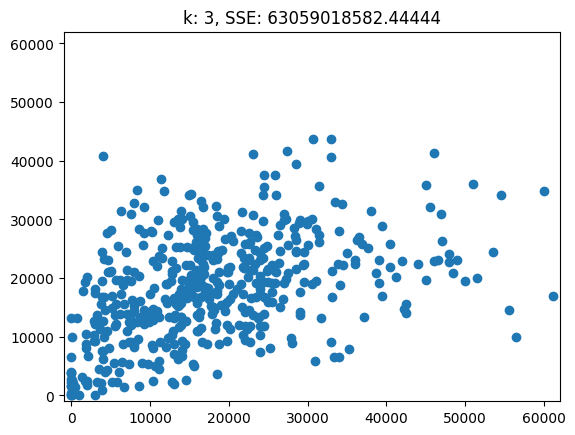

55326522093.409996


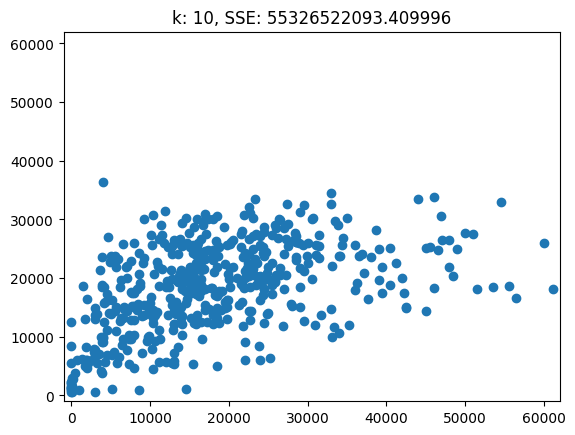

51587144576.11839


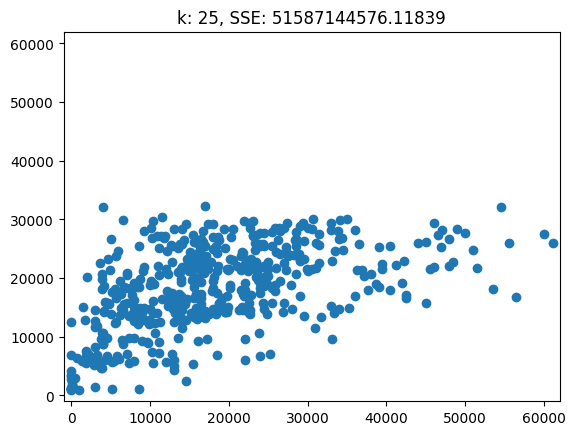

49842744749.698


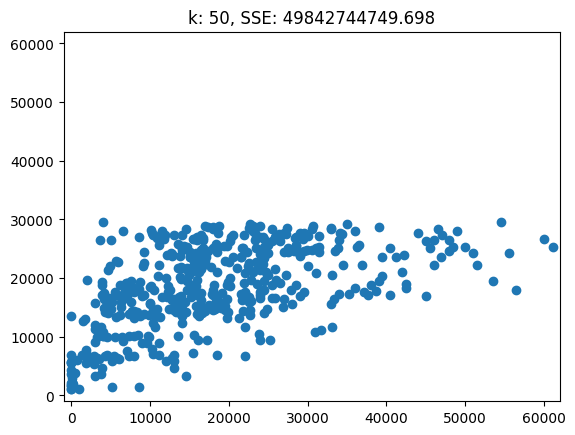

49138257511.50029


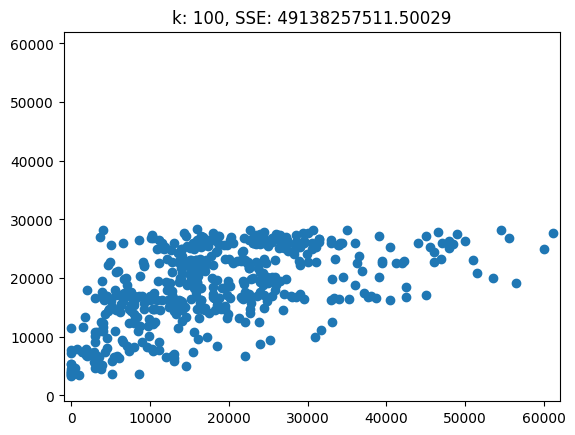

50238649457.106


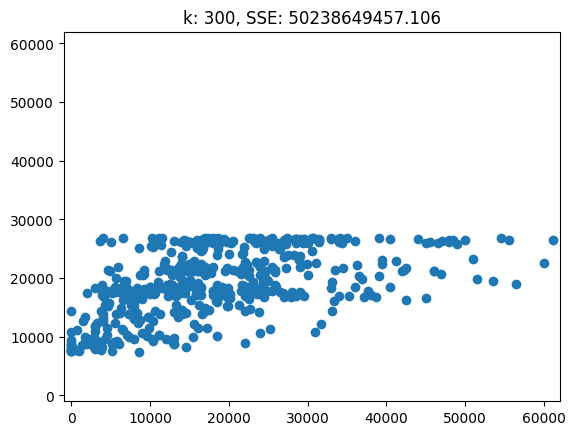

[77]


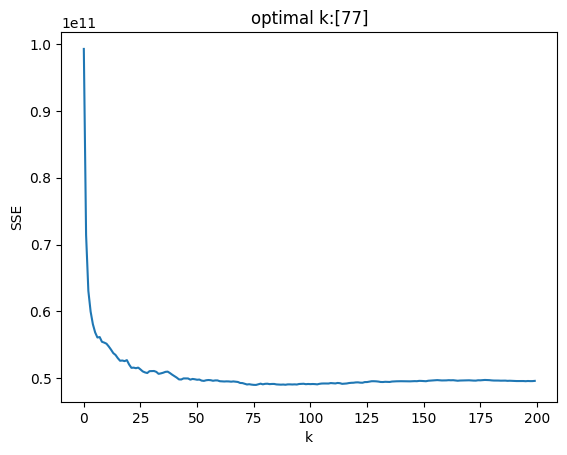

In [2]:
#1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

import numpy as np
import pandas as pd

df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ]
print(df.shape)
print(df.describe())
df.head()
#> There are no `nan`s, since there are 2499 observations of each variable, and 2499 rows in the dataset.

#2. Maxmin normalize `year` and `mileage`.

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])


#3. Split the sample into ~80% for training and ~20% for evaluation.

from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

#4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    print(SSE)
    #
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()
#> The range of predicted values flattens, and the variability of predictions onditional on price shrinks.

#5. Determine the optimal $k$ for these data.

k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
 
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

#6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

#> The optimal $k$ is around 77, so for 300, the model is probably overfitting, and for 3, 10, and 25, the model is underfitting. For $k$ equal to 50 and 100, the answer is pretty close. What do we notice about $k=300$? There is a bunch of horizontal bunching, where common answers start to exert a lot of influence on the predictions and organize them into horizontal groups. Since the data are fairly evenly distributed, this is an unnatural artifact of over-fitting. On the other hand, for very small $k$, like 3, the predictions are high variance and low precision.

#> The other thing to notice is that as $k$ increases, the range of predictions shrinks: The high, outlier values become less influential, and predictions shrink towards average values. 


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'class'],
      dtype='object')
(101, 18)
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']
['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm']
['fl

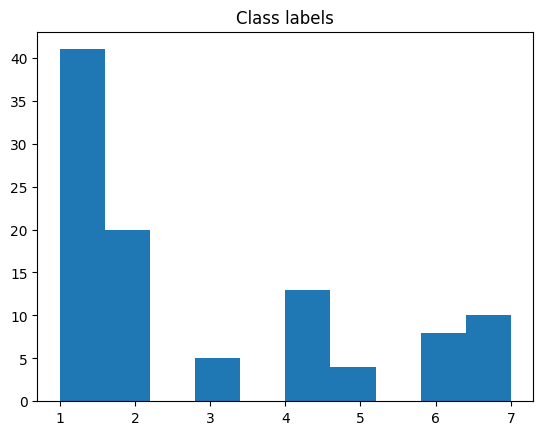

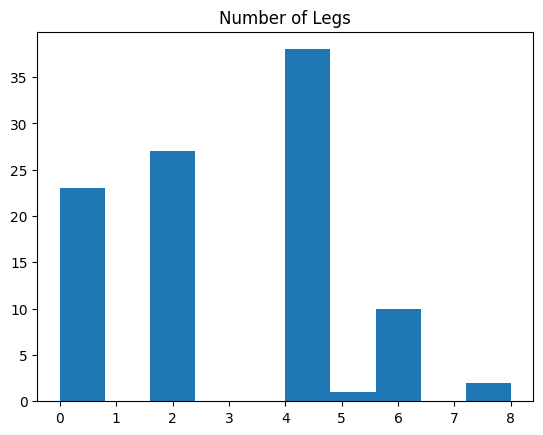

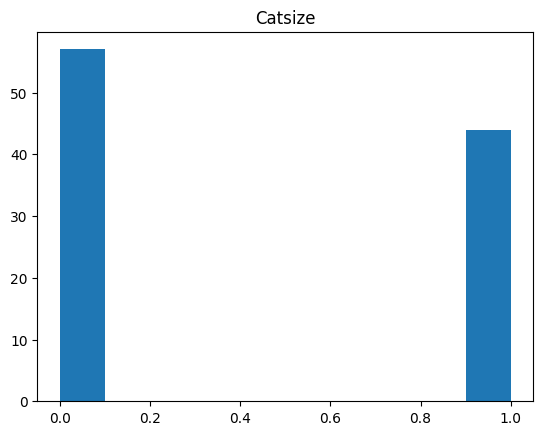

0.9019607843137255
[1]


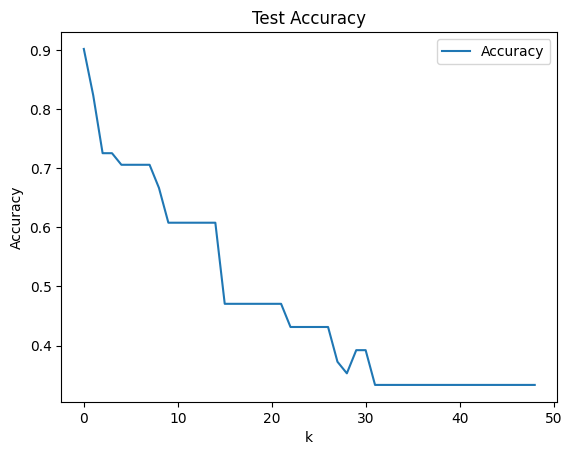

All variables, confusion table: class   1  2  3  4  5  6  7
row_0                      
1      17  0  1  0  0  0  0
2       0  9  0  0  0  0  0
3       0  0  1  0  0  0  0
4       0  0  1  7  0  0  0
5       0  0  1  0  3  0  0
6       0  0  0  0  0  5  2
7       0  0  0  0  0  0  4
0.6470588235294118
[2 3 5 6]


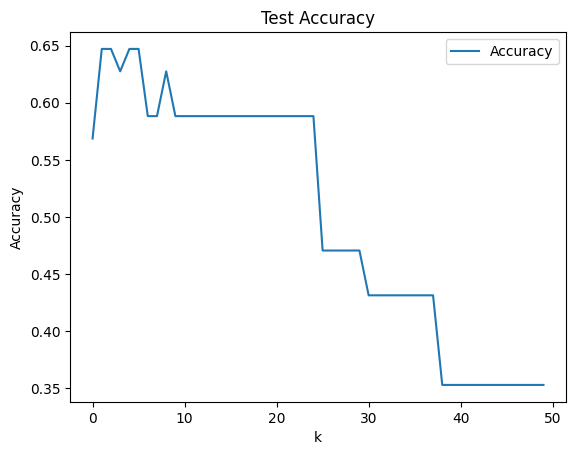

Confusion table: class   1  2  3  4  5  6  7
row_0                      
1      18  0  0  0  0  0  0
2       0  6  0  0  0  5  0
3       0  2  3  0  0  1  3
4       0  0  1  6  2  0  4
Notice how many classes are empty in the confusion table.
[[1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5]
 [0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.  0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?

df = pd.read_csv('./data/zoo.csv')
print(df.columns)
print(df.shape)
df.head()

classes = list(df['class'].unique())
[ print(df.loc[ df['class'] == item, 'animal'].unique()) for item in classes]

#> There's a large chordate class for 1, fish in 2, birds in 3, miscellaneous sea creatures in 4, bugs in 5, reptiles in 6, and tube creatures in 7.

df['class'].hist(grid=False)
plt.title('Class labels')
plt.show()

df['legs'].hist(grid=False)
plt.title('Number of Legs')
plt.show()

df['catsize'].hist(grid=False)
plt.title('Catsize')
plt.show()

#2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

## Select data:
x_vars = df.columns.tolist()
y = df['class'] # Target variable
x_vars.remove('animal')
x_vars.remove('class')
X = df.loc[:,x_vars] # Create feature matrix
X.describe()

## Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5,
                                                    random_state=125) # For replication purposes

#3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

from sklearn.neighbors import KNeighborsClassifier

## Solve for k that maximizes accuracy:
N_train = len(y_train)
N_test = len(y_test)
k_bar = N_train-1 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here 

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(Acc_max)
print(k_star)

## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy') 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

#4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

## Confusion Table:
print('All variables, confusion table:', pd.crosstab(y_hat, y_test))


#5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

## Select data:
x_vars = ['milk','aquatic','airborne']

y = df['class'] # Target variable
X = df.loc[:,x_vars] # Create feature matrix

## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5)#, # Split the sample 80 train/ 20 test
                                                    #random_state=200) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here 

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(Acc_max)
print(k_star)


## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy') 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = model.predict(X_test.values) # Predict values for test set

## Confusion Table:
print('Confusion table:', pd.crosstab(y_hat, y_test))

print('Notice how many classes are empty in the confusion table.')

print( model.predict_proba(X_test.values) )

print('Notice how that, despite those classes being empty, they have non-zero predictive probability.')
print('This is an example of why making hard label classifications can be risky:')
print('you throw away information about the prevalence of "minority classes" that do not have a high likelihood.')

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

   veh id manufacturer nameplate    model  CVCM class     EPA class  \
0       1        HONDA     Acura  MDX 4WD          11           SUV   
1       2        HONDA     Acura      RDX          11           SUV   
2       3        HONDA     Acura       RL           4  MIDSIZE CARS   
3       4        HONDA     Acura       TL           4  MIDSIZE CARS   
4       5        HONDA     Acura      TSX           3  COMPACT CARS   

  fleet type fuel type  footprint  baseline price  baseline mpg  \
0          T         G       50.8     45706.20000     22.052700   
1          T         G       45.1     34588.20000     24.174500   
2          C         G       47.6     47934.90000     24.562900   
3          C         G       47.8     35217.81622     27.068237   
4          C         G       46.0     29483.10000     29.855173   

   baseline sales  predicted mpg  
0         57380.0      23.011100  
1         21271.0      26.457747  
2          5132.0      23.773800  
3         56720.0      26.8841

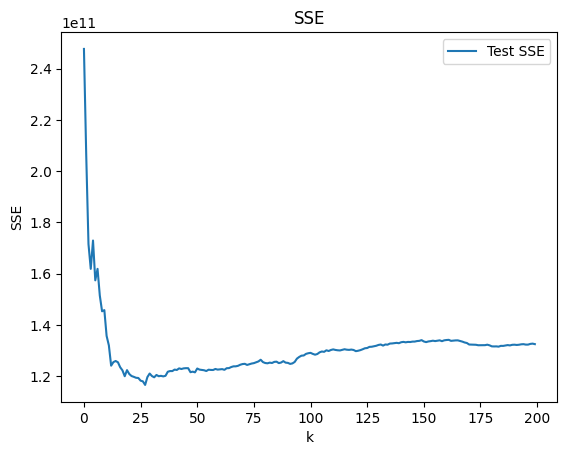

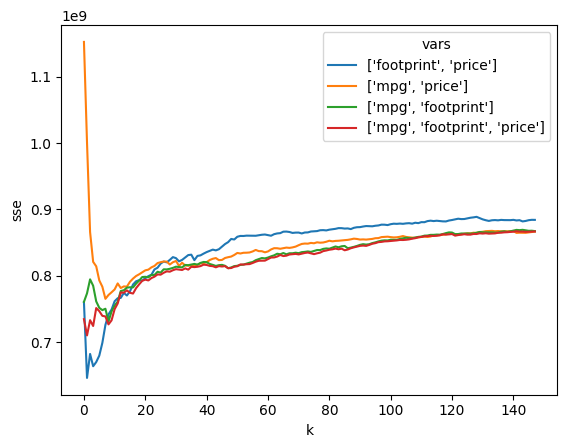

646214942.2865593
765307146.4872227
731167988.5937158
710205461.4358218
Footprint and price appear to do the best, in terms of predicting consumer behavior (i.e. sales).


In [62]:
# 1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/cars_env.csv')
print(df.head())

y = df['baseline sales']
X = df.loc[:, ['footprint','baseline mpg','baseline price'] ]

X = X.rename(columns = {'baseline mpg':'mpg','baseline price':'price'})
print(X.head())

# 2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?

def maxmin(z):
    u = (z-min(z))/(max(z)-min(z))
    return u
X = X.apply(maxmin)
X.describe()

# 3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 

from sklearn.model_selection import train_test_split # Split the sample
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.3, # Split the sample 80 train/ 20 test
                                                    random_state=300) # For replication purposes

# 4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 

from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool

## Price, mpg, and footprint:
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here 
SSE_on_train = np.zeros(k_bar) # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# 5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.4, # Split the sample 80 train/ 20 test
                                                    random_state=10000) # For replication purposes

vars1 = ['footprint','price']
vars2 = ['mpg','price']
vars3 = ['mpg','footprint']
vars4 = ['mpg','footprint', 'price']

kgrid = np.arange(2,150)
N = len(y)

SSE_results = []
y_hat_results = []
for var_list in [vars1, vars2, vars3,vars4]:
    X_train_1 = X_train.loc[:,var_list ]
    X_test_1 = X_test.loc[:,var_list]
    SSE = np.zeros(len(kgrid)) # We'll store the SSE here 
    for k in range(len(kgrid)):
        model = KNeighborsRegressor(n_neighbors=kgrid[k]) # Create a sk model for k
        fitted_model = model.fit(X_train_1,y_train) # Train the model on our data
        y_hat = fitted_model.predict(X_test_1) # Predict values for test set
        y_hat_results.append(y_hat)
        SSE_results.append( {'sse':np.sum( (y_test-y_hat)**2)/N,
                            'vars':str(var_list),
                            'k':k} ) # Save the computed SSE for test set
gdf = pd.DataFrame.from_dict(SSE_results)

sns.lineplot(y='sse',x='k',data=gdf,hue='vars')
plt.show()

print( np.min( gdf.loc[gdf['vars'] == str(vars1),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars2),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars3),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars4),'sse']))

# 6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

print('Footprint and price appear to do the best, in terms of predicting consumer behavior (i.e. sales).')


**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

(338, 4)
    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


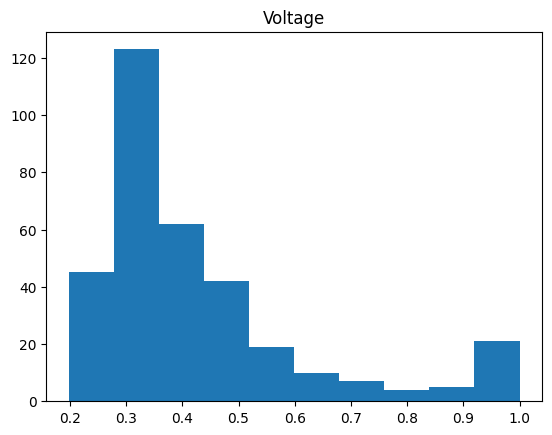

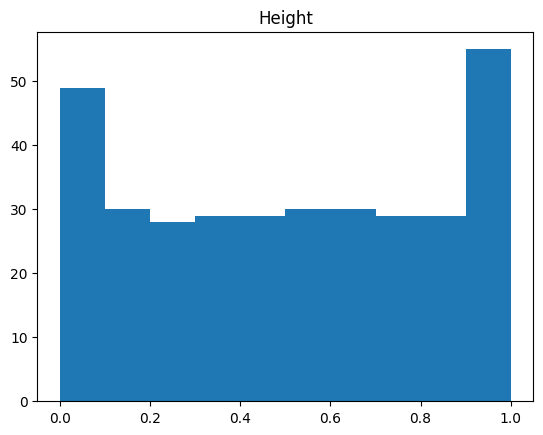

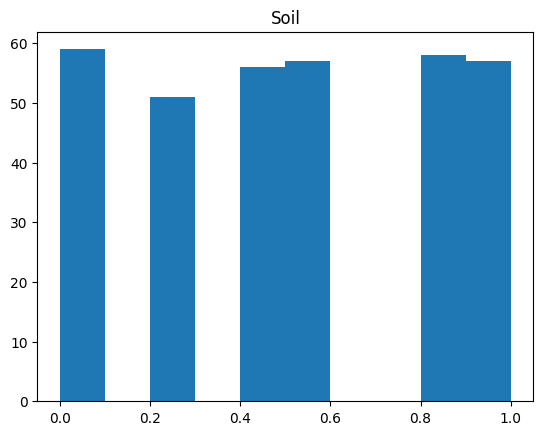

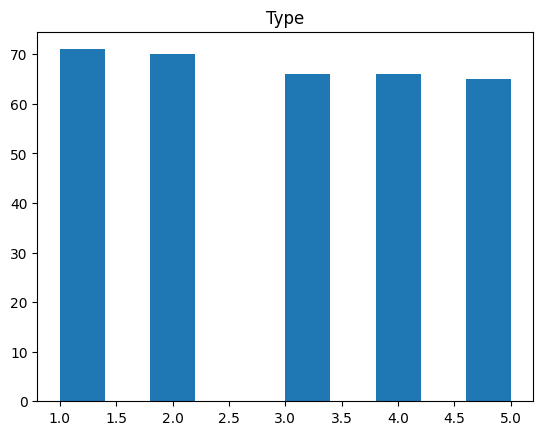

Maximum accuracy:  0.41420118343195267
Optimal k:  [2]


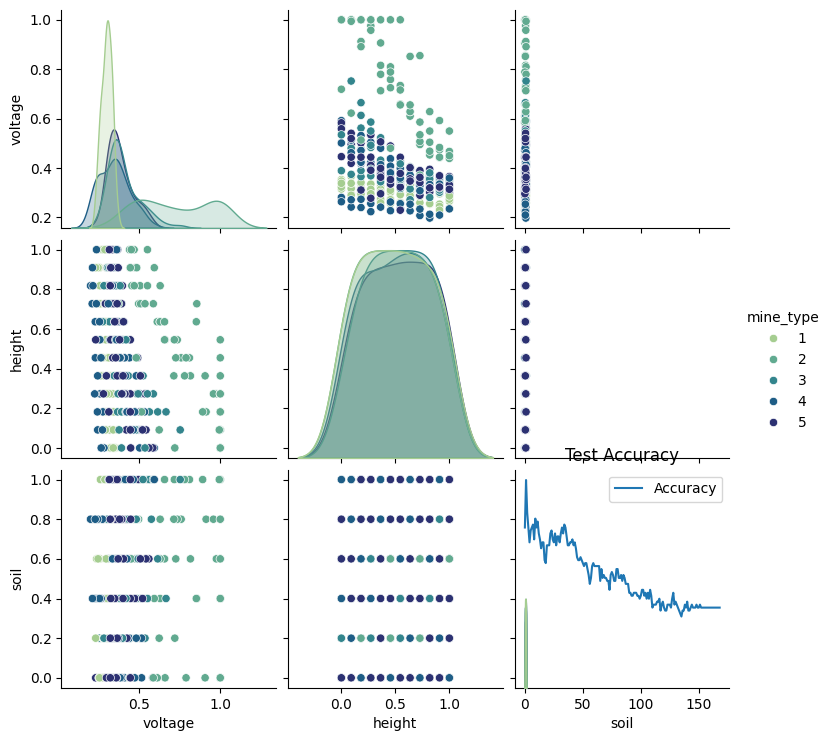

mine_type   1   2   3   4   5
row_0                        
1          23   1  12  14  11
2           0  32   1   5   1
3           9   4  10   9  15
4           4   3   3   4   2
5           1   0   1   3   1
The accuracy is around 40%, which is probably not something you want to risk lives or limbs on.
When 1 is predicted, it is often 1, but often 3,4,5 as well.
When 2 is predicted, the prediction is pretty reliable.
When 3 or 4 are predicted, it could be any of the types.
When 5 is predicted, the results are bad.
For this model, I might use it to predict 2, but otherwise there are
a lot of errors that make it risky to use in practice.


In [63]:
# 1. Load the data. Perform some EDA, summarizing the target label and the features.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/land_mines.csv')

print(df.shape)
print(df.head())
print(df.describe())

df['voltage'].hist(grid=False)
plt.title('Voltage')
plt.show()

df['height'].hist(grid=False)
plt.title('Height')
plt.show()

df['soil'].hist(grid=False)
plt.title('Soil')
plt.show()

df['mine_type'].hist(grid=False)
plt.title('Type')
plt.show()

sns.pairplot(df, hue="mine_type", palette='crest')

# 2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

## Split the sample:
y = df['mine_type'] # Target variable
X = df.loc[:,['voltage','height','soil']] # Create feature matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes

# 3. Build a $k$-NN classifier. Explain how you select $k$.
N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here 

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data
Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print('Maximum accuracy: ', Acc_max)
print('Optimal k: ', k_star)


## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy') 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set


# 4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?

## Confusion Table:
print(pd.crosstab(y_hat, y_test))

print('The accuracy is around 40%, which is probably not something you want to risk lives or limbs on.')
print('When 1 is predicted, it is often 1, but often 3,4,5 as well.')
print('When 2 is predicted, the prediction is pretty reliable.')
print('When 3 or 4 are predicted, it could be any of the types.')
print('When 5 is predicted, the results are bad.')

# 5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

print('For this model, I might use it to predict 2, but otherwise there are')
print('a lot of errors that make it risky to use in practice.')


**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

(299, 13)
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000      

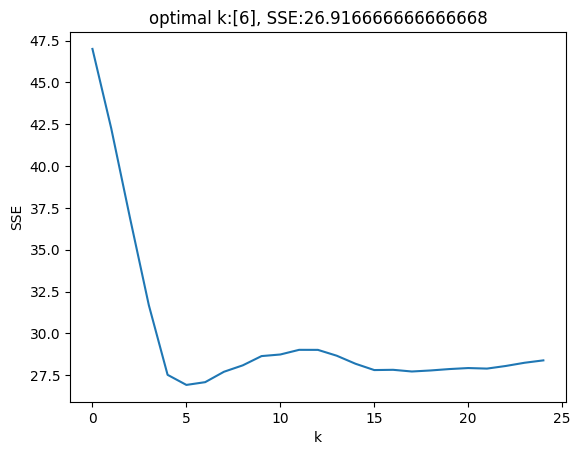

[83]


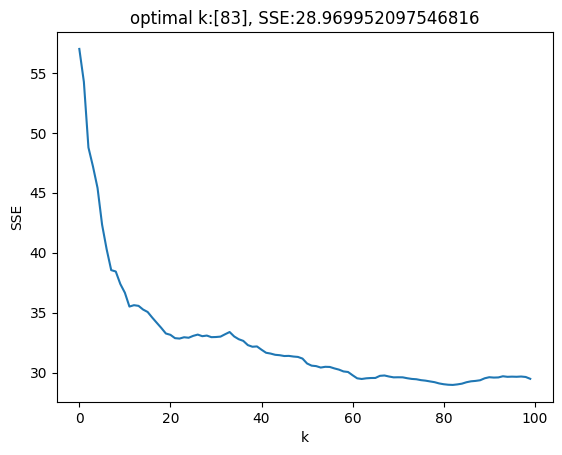

In [64]:
# 1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

import pandas as pd
import numpy as np
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
print(df.shape)
print(df.describe())

#> No missing values, since 299 values for every variable and 299 observations in total.

df = df.drop('time',axis=1)

# 2. Make a correlation matrix. What variables are strongly associated with a death event?
print(df.corr())
print('The variables with the strongest correlation with `DEATH_EVENT` are age (.254), ejection_fraction (-.269), and serum_creatine (.294). ')

# 3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for var in vars:
    print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())
    
#> > Let's look at the means for high_blood_pressure. For the proportion of the population that has HBP, the DEATH_EVENT average is .371, while for the proportion of the population that does not have HBP, the DEATH_EVENT average is only .294. That's a 27% increase in the frequency of death events. So HPB seems highly predictive. On the other hand, for sex, the mean values are almost the same for men and women, at .32, so the sex variable isn't a very powerful predictor of death events. Anaemia and high blood pressure seem like the strongest predictors.



# 4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

y = df['DEATH_EVENT']
vars = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
X = df.loc[:,vars]

# 5. Maxmin normalize all of the variables in `X`.

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

# 6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
np.random.seed(100) 
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

# 7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 25
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

# 8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

X = df.drop('DEATH_EVENT',axis=1)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

# >> With more variables, the algorithm selects a higher optimal $k^* = 83$ instead of $k^*=6$, and it has a higher SSE of 29 rather than 27. The simpler model (fewer variables, fewer neighbors) does a better job predicting.


**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

   Review Scores Rating Price  Beds
0                   NaN   145   1.0
1                   NaN    37   1.0
2                   NaN    28   1.0
3                   NaN   199   3.0
4                  96.0   549   3.0
       Review Scores Rating          Beds
count          22155.000000  30393.000000
mean              91.993230      1.530089
std                8.850373      1.015359
min               20.000000      0.000000
25%               89.000000      1.000000
50%               94.000000      1.000000
75%              100.000000      2.000000
max              100.000000     16.000000
       Review Scores Rating         Price          Beds
count          22155.000000  30478.000000  30393.000000
mean              91.993230    163.589737      1.530089
std                8.850373    197.785454      1.015359
min               20.000000     10.000000      0.000000
25%               89.000000     80.000000      1.000000
50%               94.000000    125.000000      1.000000
75%           

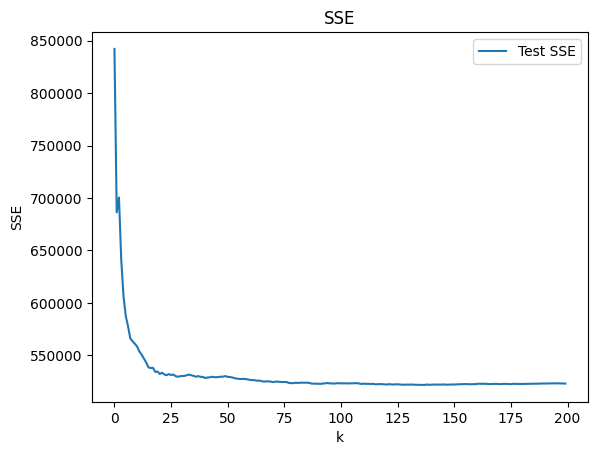

The imputed values are much more compressed than the real ones.


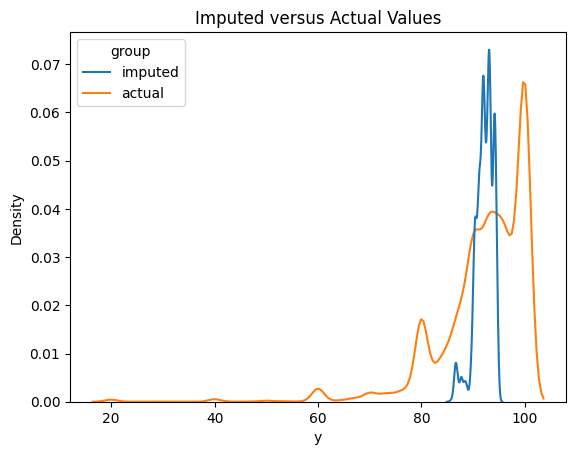

In [66]:
# 1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/airbnb_hw.csv')
df = df.loc[:,['Review Scores Rating','Price','Beds'] ]
print(df.head())

print(df.describe())

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric( df['Price'], errors='coerce')

print(df.describe())
print(df.dtypes)

df = df.rename(columns={'Price':'price','Beds':'beds','Review Scores Rating':'review'})


# 2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
select = df['review'].isnull()
df_to_impute = df.loc[select,:]

# 3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
df = df.dropna(axis=0,how='any')


# 4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)

y = df['review']
X = df.loc[:,['price','beds'] ]

## Split the sample:
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool
from sklearn.model_selection import train_test_split # Split the sample
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.3, # Split the sample 80 train/ 20 test
                                                    random_state=300) # For replication purposes

k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here 

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# Fit the optimal model:
model = KNeighborsRegressor(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data

# 5. Predict the missing ratings. 
x_impute = df_to_impute.loc[:,['price','beds'] ]
x_impute = x_impute.dropna(axis=0,how='any')
y_impute = fitted_model.predict(x_impute)

# 6. (Optional) Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

imputed = pd.DataFrame.from_dict({ 'y':y_impute,'group':'imputed'})
true = pd.DataFrame.from_dict({'y':df['review'],'group':'actual'})
gdf = pd.concat([imputed,true],axis=0)

sns.kdeplot(x='y',hue='group',data=gdf)
plt.title('Imputed versus Actual Values')

print('The imputed values are much more compressed than the real ones.')



